#### K-means clustering - example I

##### Ex. 1

In [1]:
from sklearn.datasets import make_blobs 
 
help(make_blobs)

Help on function make_blobs in module sklearn.datasets._samples_generator:

make_blobs(n_samples=100, n_features=2, *, centers=None, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None, return_centers=False)
    Generate isotropic Gaussian blobs for clustering.
    
    Read more in the :ref:`User Guide <sample_generators>`.
    
    Parameters
    ----------
    n_samples : int or array-like, default=100
        If int, it is the total number of points equally divided among
        clusters.
        If array-like, each element of the sequence indicates
        the number of samples per cluster.
    
        .. versionchanged:: v0.20
            one can now pass an array-like to the ``n_samples`` parameter
    
    n_features : int, default=2
        The number of features for each sample.
    
    centers : int or ndarray of shape (n_centers, n_features), default=None
        The number of centers to generate, or the fixed center locations.
        If n_samples 

##### Ex. 2

In [2]:
X, y = make_blobs(n_samples=120, n_features=2, centers=4, cluster_std=0.4)

##### Ex. 3

In [3]:
print(f'X.shape = {X.shape}')
print(f'y.shape = {y.shape}')

X.shape = (120, 2)
y.shape = (120,)


##### Ex. 4

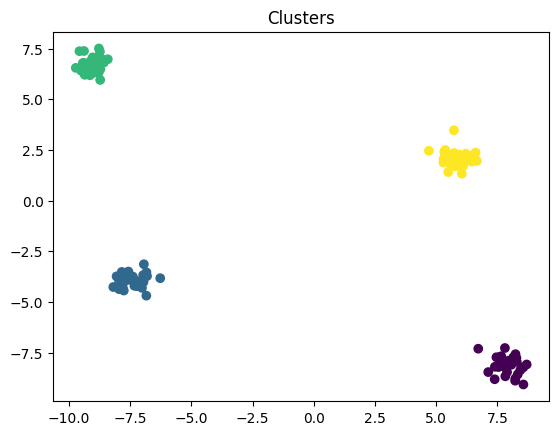

In [4]:
import matplotlib.pyplot as plt

def plot_cluster(x0, x1, y, title='Clusters'):
    plt.scatter(x0, x1, c = y)
    plt.title(title)
    plt.show()

plot_cluster(X[:, 0], X[:, 1], y)

##### Ex. 5

In [5]:
from sklearn.cluster import KMeans

kmeans = KMeans(4)
kmeans.fit(X)
y_pred = kmeans.predict(X)

##### Ex. 6

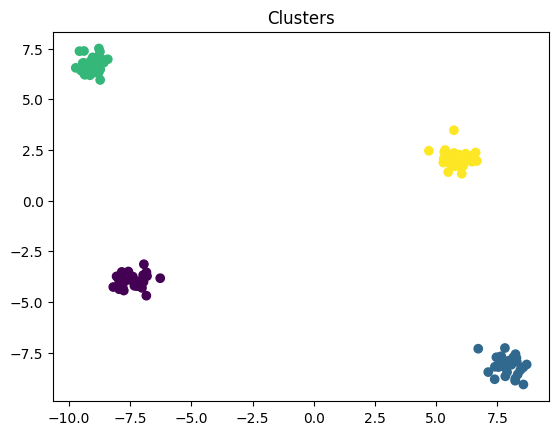

In [6]:
plot_cluster(X[:, 0], X[:, 1], y_pred)

##### Ex. 7

In [7]:
print(f"Inertia : {kmeans.inertia_:.5f}")

Inertia : 39.64228


### K-means clustering - example II

In [8]:
X, y = make_blobs(n_samples=120, n_features=2, centers=5, cluster_std=0.8)

##### Ex. 1

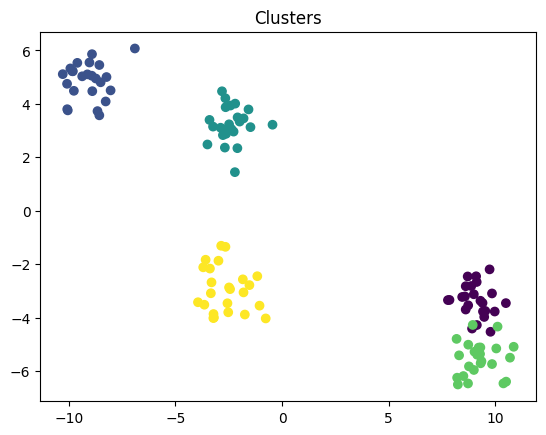

In [9]:
plot_cluster(X[:, 0], X[:, 1], y)

##### Ex. 2

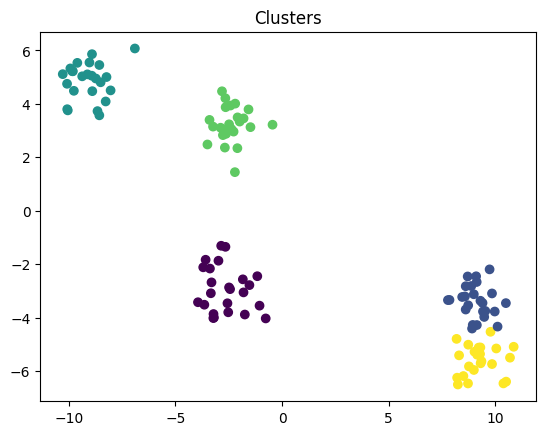

In [10]:
kmeans_5 = KMeans(5)
kmeans_5.fit(X)
y_pred_5 = kmeans_5.predict(X)
plot_cluster(X[:, 0], X[:, 1], y_pred_5)

##### Ex. 3

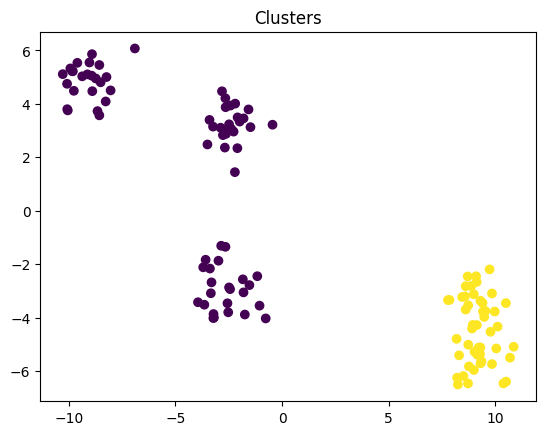

In [11]:
kmeans_2 = KMeans(2)
kmeans_2.fit(X)
y_pred_2 = kmeans_2.predict(X)
plot_cluster(X[:, 0], X[:, 1], y_pred_2)

##### Ex. 4

In [12]:
# Ex. 4
print(f"Inertia for 5 clusters: {kmeans_5.inertia_:.5f}")
print(f"Inertia for 2 clusters: {kmeans_2.inertia_:.5f}")

Inertia for 5 clusters: 122.60061
Inertia for 2 clusters: 1686.98695


### K-means++

##### Ex. 1

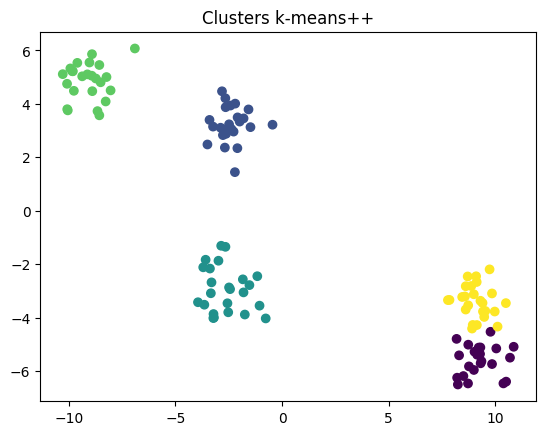

In [13]:
kmeans_5 = KMeans(5, init='k-means++')
kmeans_5.fit(X)
y_pred_5 = kmeans_5.predict(X)
plot_cluster(X[:, 0], X[:, 1], y_pred_5, 'Clusters k-means++')

##### Ex. 2

In [14]:
print(f"Inertia for 5 clusters k-means++: {kmeans_5.inertia_:.5f}")

Inertia for 5 clusters k-means++: 122.60061


### Elbow method

##### Ex. 1, 2

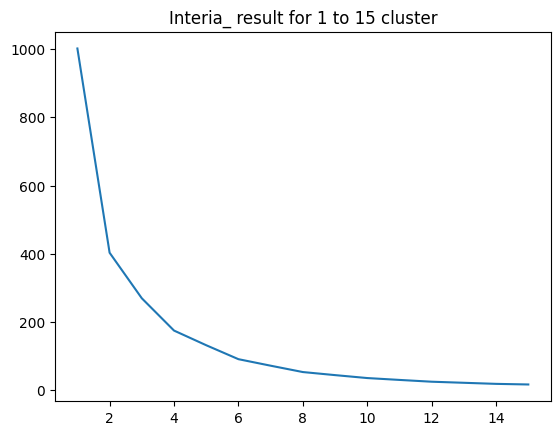

In [15]:
from sklearn.datasets import make_moons
import seaborn as sns
import pandas as pd
 
x, y = make_moons(1000, noise=.05, random_state=0)
X_moon = pd.DataFrame(x, columns = ['f1','f2'])

intertia_lst = []
N = 16

for i in range(1, N):
    kmeans_i = KMeans(i, init="k-means++")
    kmeans_i.fit(x)
    intertia_lst.append(kmeans_i.inertia_)

plt.plot([i for i in range(1, N)], intertia_lst)
plt.title(f'Interia_ result for 1 to {N-1} cluster')
plt.show()

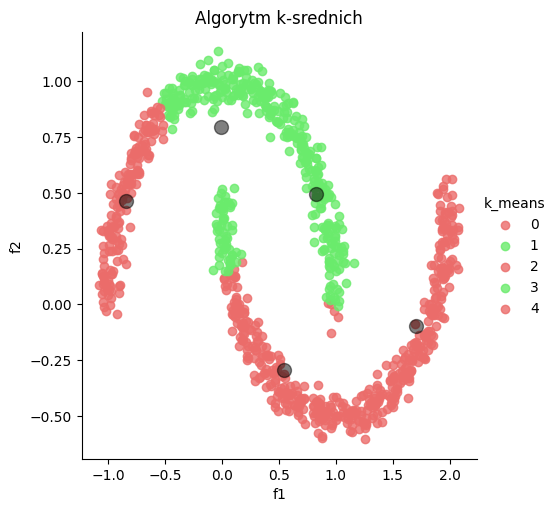

In [16]:
kmeans = KMeans(5, init='k-means++')
kmeans.fit(x)
y_km = kmeans.predict(x)
centers = kmeans.cluster_centers_

#Plot
X_moon['k_means'] = y_km
sns.lmplot(data=X_moon, x='f1', y='f2', fit_reg=False, hue = 'k_means', palette = ['#eb6c6a', '#6aeb6c']).set(title='Algorytm k-srednich')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)
plt.show()

### Clustering II - hierarchial methods

In [22]:
X, y_true = make_blobs(n_samples=300, centers=5, cluster_std=0.8, random_state=0)

##### Ex. 1

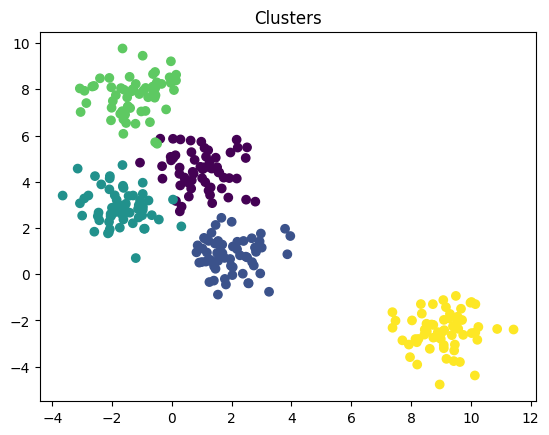

In [30]:
plot_cluster(X[:, 0], X[:, 1], y_true)

##### Ex. 2

In [31]:
kmeans = KMeans(2, init='random')
kmeans.fit(X)

KMeans(init='random', n_clusters=2)

##### Ex. 3

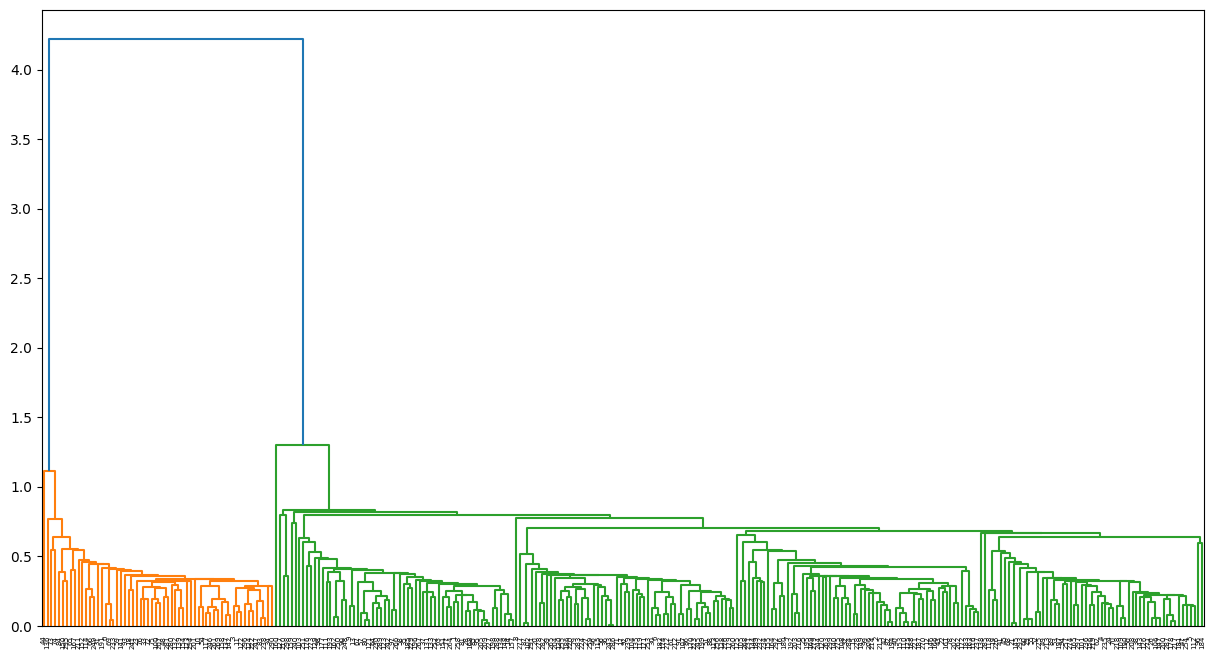

In [51]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(X)
fig = plt.figure(figsize=(15, 8))
dn = dendrogram(Z)
plt.show()

##### Ex. 4

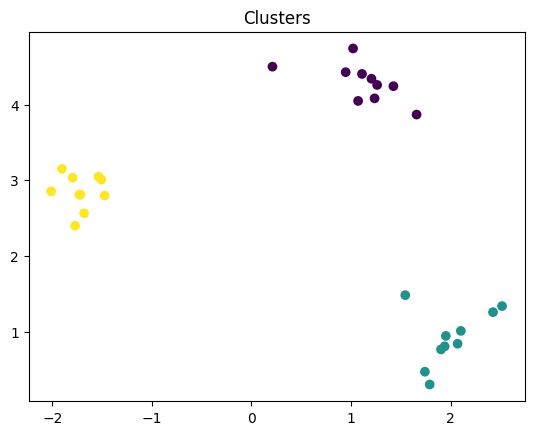

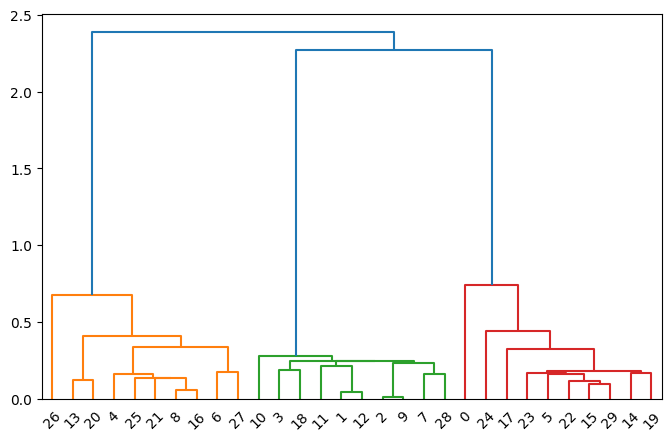

In [50]:
X_small, y_small = make_blobs(n_samples=30, centers=3, cluster_std=0.3, random_state=0)

plot_cluster(X_small[:, 0], X_small[:, 1], y_small)

# Dendogram for small number of data
Z = linkage(X_small)
fig = plt.figure(figsize=(8, 5))
dn = dendrogram(Z)
plt.show()

### Agglomerative clustering

In [52]:
df = pd.read_csv("shopping_data.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


##### Ex. 5

In [55]:
df = df[["Annual Income (k$)", "Spending Score (1-100)"]]
df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


##### Ex. 6

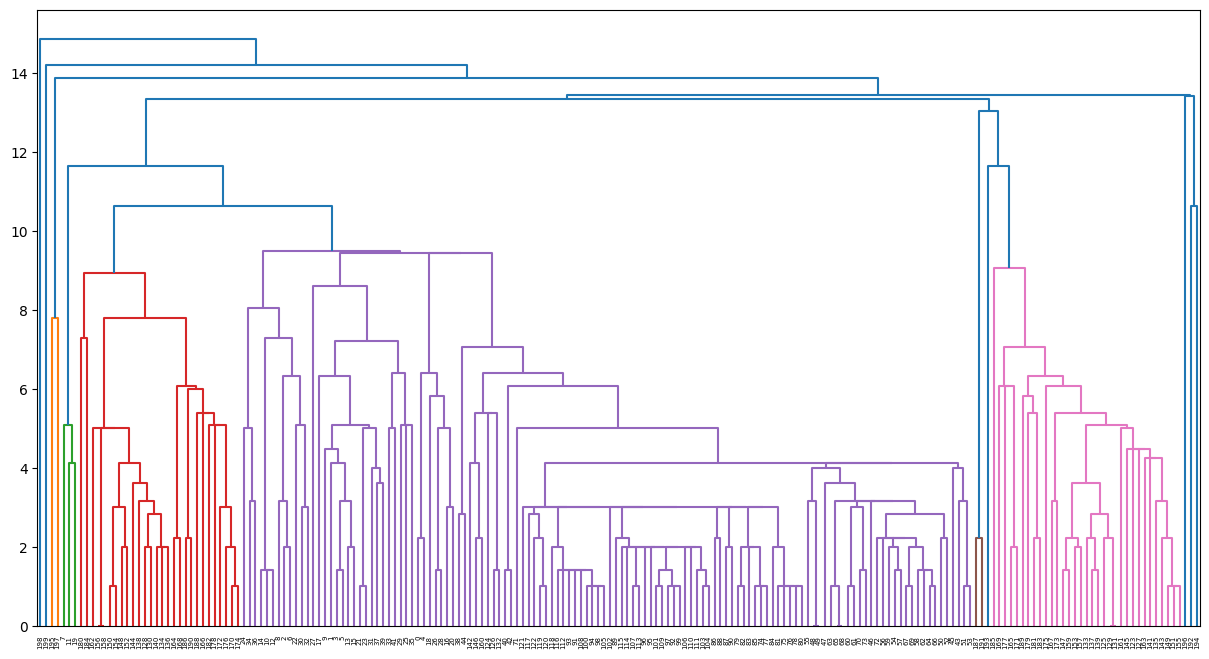

In [59]:
Z = linkage(df)
fig = plt.figure(figsize=(15, 8))
dn = dendrogram(Z)
plt.show()

##### Ex. 7

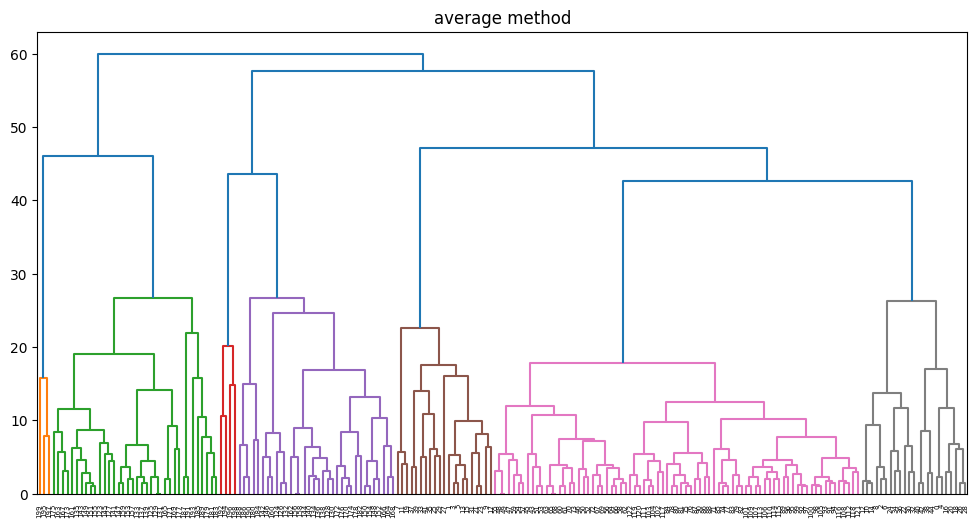

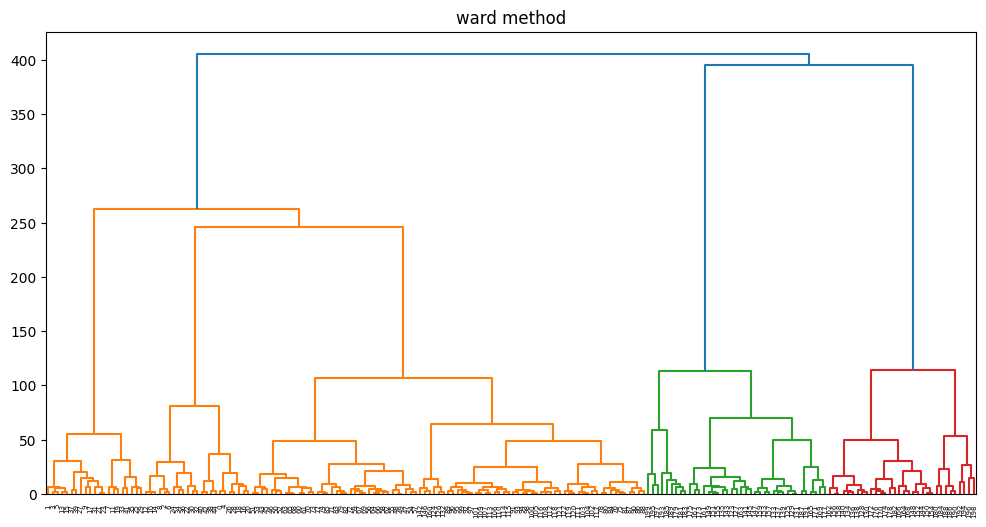

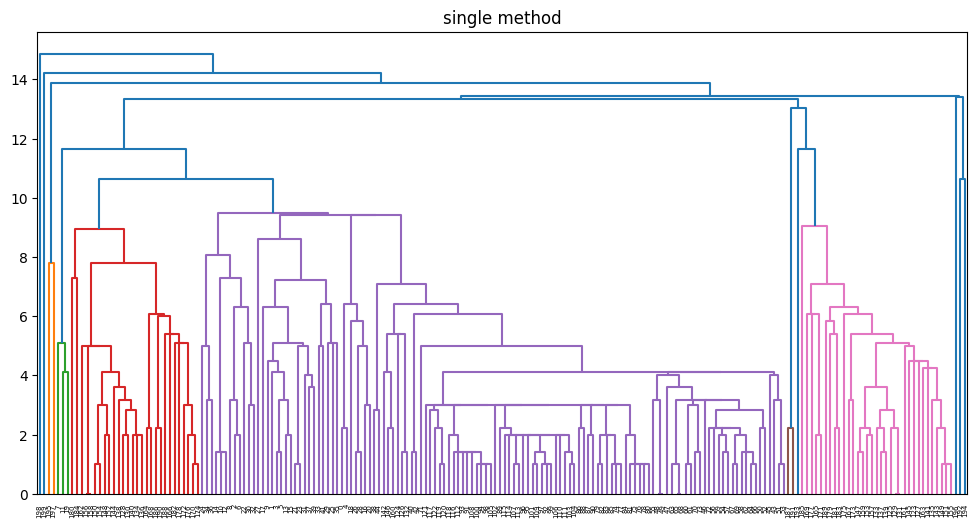

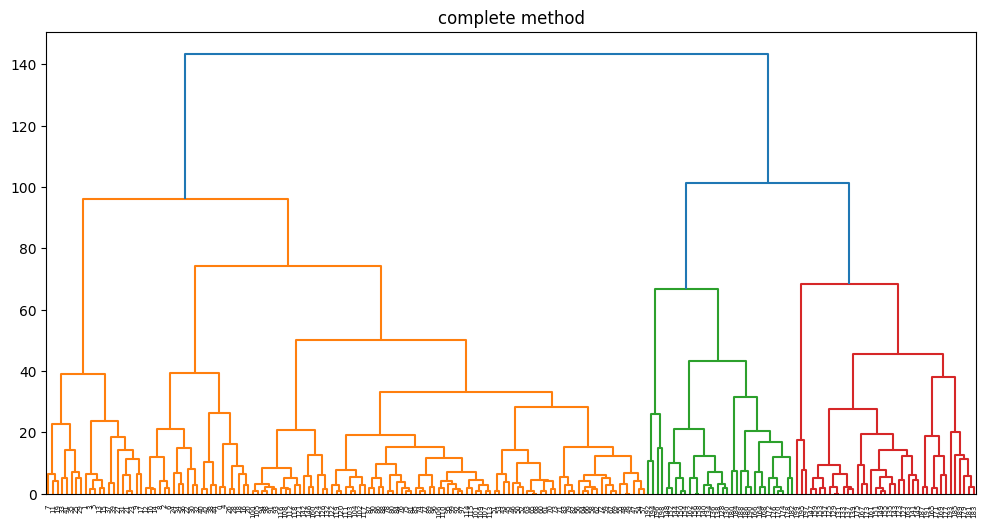

In [64]:
methods_lst = ['average', 'ward', 'single', 'complete']

for method in methods_lst:
    Z = linkage(df, method)
    fig = plt.figure(figsize=(12, 6))
    plt.title(f"{method} method")
    dn = dendrogram(Z)
    plt.show()

##### Ex. 8, 9

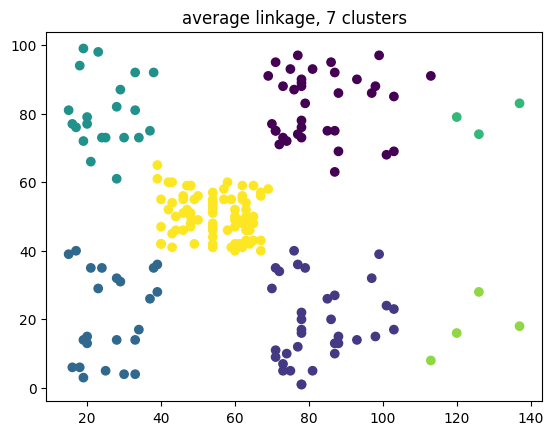

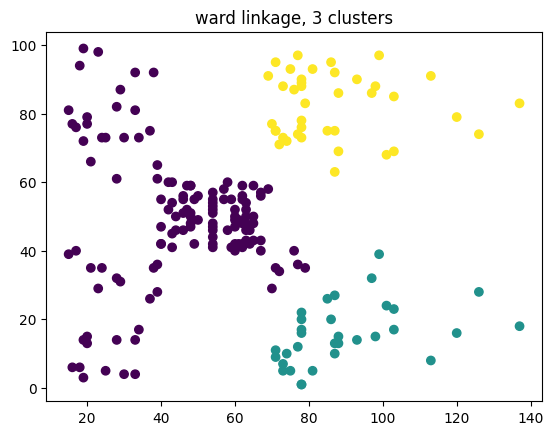

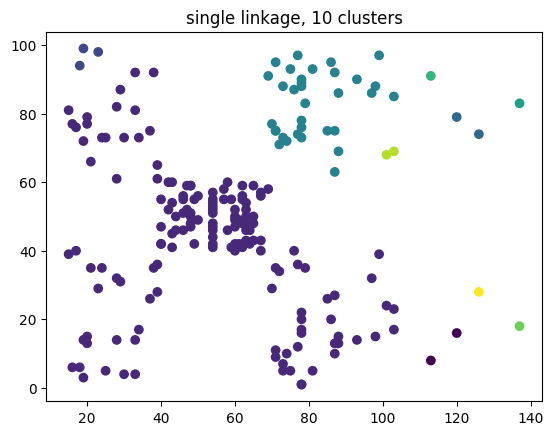

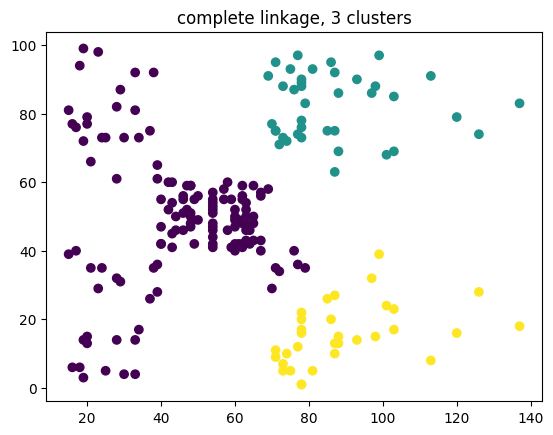

In [71]:
from sklearn.cluster import AgglomerativeClustering

cluster_linkage_data = {
    "average": 7,
    "ward": 3,
    "single": 10,
    "complete": 3
}

for key, value in cluster_linkage_data.items():
    AggCluster = AgglomerativeClustering(n_clusters=value, linkage=key)
    AggCluster.fit(df)
    y_pred = AggCluster.fit_predict(df)

    plot_cluster(df["Annual Income (k$)"], df["Spending Score (1-100)"], 
                 y_pred, f"{key} linkage, {value} clusters")

### Selecting the number of clusters with silhouette analysis on KMeans clustering

##### Ex. 1

In [76]:
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1) 

##### Ex. 2

In [96]:
N = 8
cluster_range = [i for i in range(2, N)]

##### Ex. 3

k = 2, silhoutte_score = 0.7049787


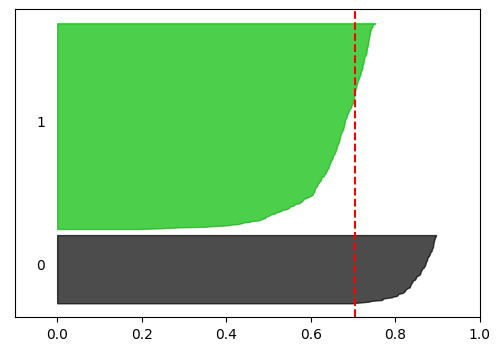

k = 3, silhoutte_score = 0.5882004


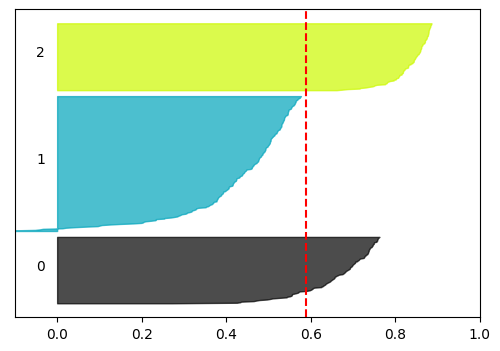

k = 4, silhoutte_score = 0.6505187


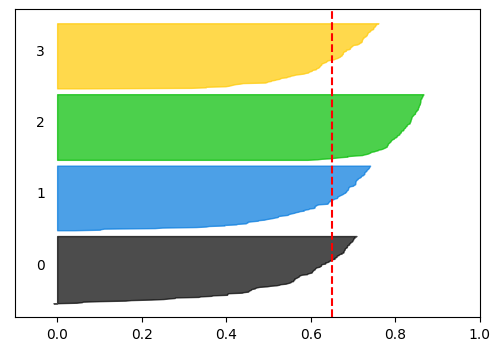

k = 5, silhoutte_score = 0.5743947


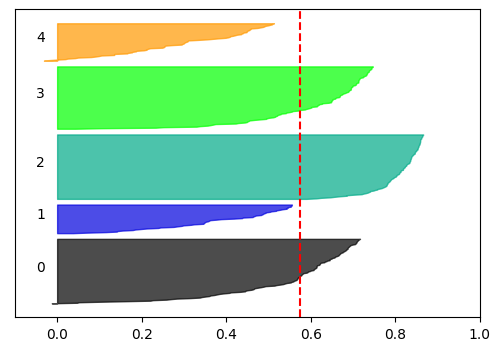

k = 6, silhoutte_score = 0.4521941


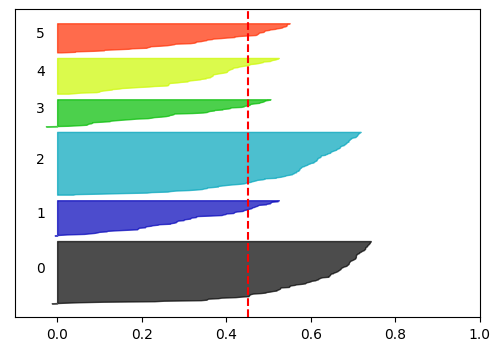

k = 7, silhoutte_score = 0.3790081


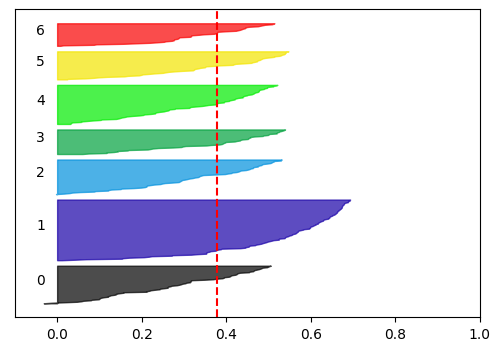

In [110]:
from sklearn.metrics import silhouette_score, silhouette_samples
import numpy as np
import matplotlib.cm as cm

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters, init='random')
    kmeans.fit(X)
    y_pred = kmeans.predict(X)

    silh_score = silhouette_score(X, y_pred)
    print(f"k = {n_clusters}, silhoutte_score = {silh_score:.7f}")

    silh_samples = silhouette_samples(X, y_pred)

    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(6, 4)
    y_lower = 10

    for i in range(n_clusters):
        cluster = silh_samples[y_pred == i]
        cluster.sort()
        size_cluster_i = cluster.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)

        ax.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            cluster,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
    
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
    
    plt.axvline(silh_score, color="#FF0000",linestyle = '--')
    plt.yticks([])
    plt.xlim([-0.1, 1])
    plt.show()

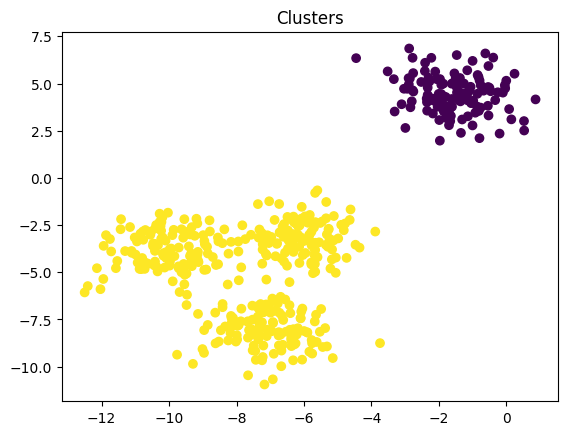

In [122]:
# The highest value of silhoutte_score is for 2 or 4.
kmeans = KMeans(2, init='random')
kmeans.fit(X)
y_pred = kmeans.predict(X)

plot_cluster(X[:, 0], X[:, 1], y_pred)

### DBSCAN - density based clusterring

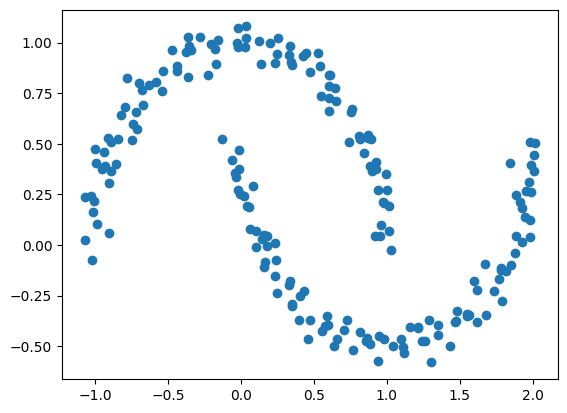

In [177]:
from sklearn.datasets import make_moons, make_circles
x, y = make_moons(n_samples=200, noise=.05, random_state=0)
plt.scatter(x[:,0], x[:,1])
plt.show()

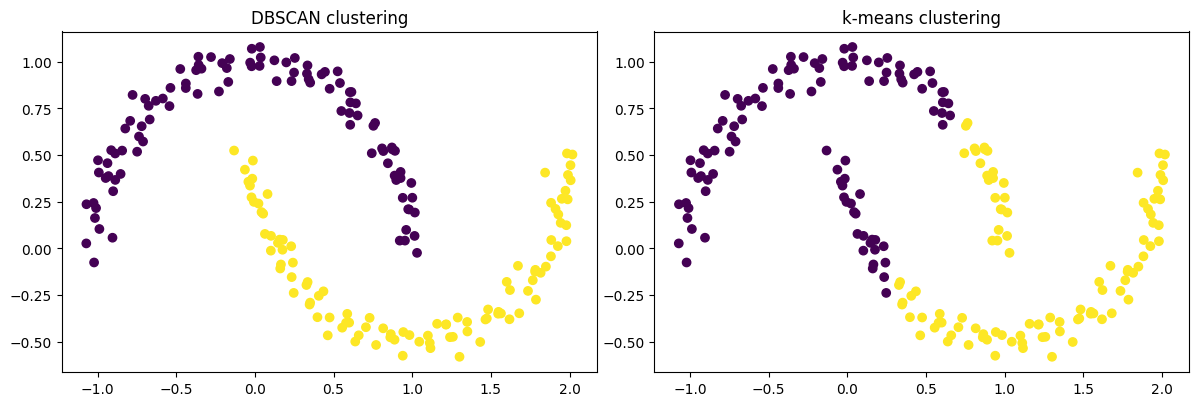

In [178]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2)
dbscan.fit(x)
y_pred_dbscan = dbscan.fit_predict(x)

kmeans = KMeans(2, init='random')
kmeans.fit(x)
y_pred_kmeans = kmeans.predict(x)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(12, 4)
fig.tight_layout()
ax1.scatter(x[:,0], x[:,1], c = y_pred_dbscan)
ax1.set_title("DBSCAN clustering")

ax2.scatter(x[:,0], x[:,1], c = y_pred_kmeans)
ax2.set_title("k-means clustering")

plt.show()

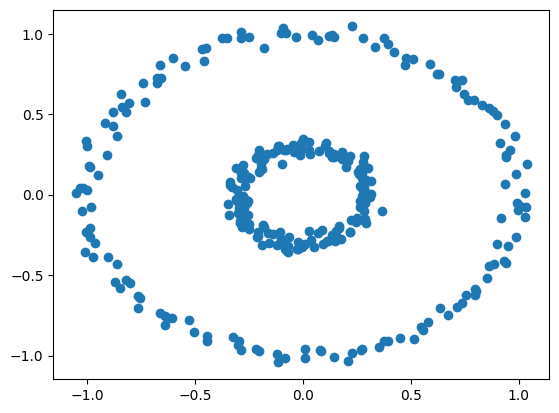

In [179]:
x, y = make_circles(n_samples=(150, 150), noise=0.03, random_state=0, factor=0.3)
plt.scatter(x[:,0], x[:,1])
plt.show()

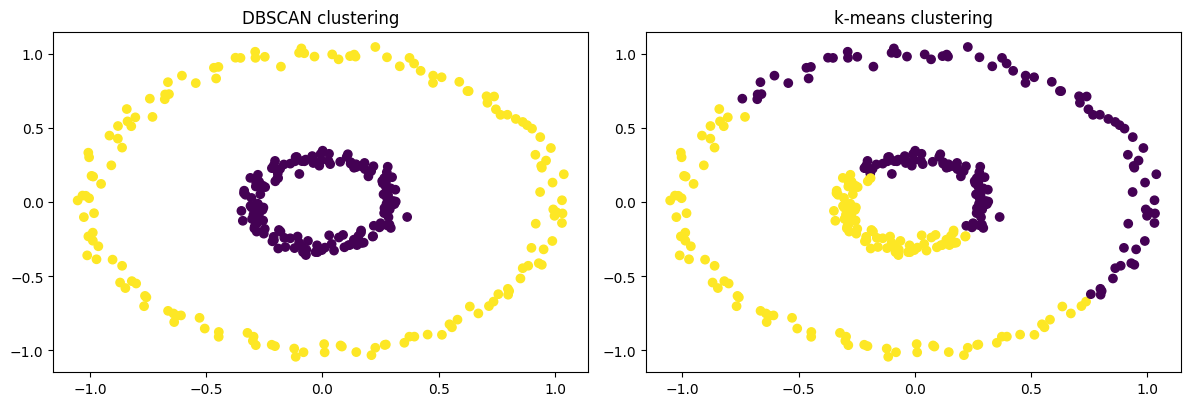

In [180]:
dbscan = DBSCAN()
dbscan.fit(x)
y_pred_dbscan = dbscan.fit_predict(x)

kmeans = KMeans(2, init='random')
kmeans.fit(x)
y_pred_kmeans = kmeans.predict(x)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(12, 4)
fig.tight_layout()
ax1.scatter(x[:,0], x[:,1], c = y_pred_dbscan)
ax1.set_title("DBSCAN clustering")

ax2.scatter(x[:,0], x[:,1], c = y_pred_kmeans)
ax2.set_title("k-means clustering")

plt.show()